# Import needed modules and useful functions

In [1]:
#-- necessary modules --#
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

#-- useful python script for training the DeepTICA cvs --#
from utils import *

#-- to not visualize warnings --#
import warnings
warnings.filterwarnings('ignore')

# Simulation parameters 

In [2]:
#-- SIMULATION PARAMETERS --#
sim_parameters = {
    'temp':0.5, #kbt units
}
#--------------------------------------#
folder = "unbias/"
# simulated data from unbias simulation
data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^p.').columns.values

# Different lags $\Delta \lambda$

In [3]:
#-- TRAINING PARAMETERS --#
n_output = 2
n_input = 2
train_parameters = {
              'descriptors': '^p.',
              'nodes':[n_input,10,n_output], 
              'activ_type': 'tanh',
              'lag_time':1,
              'loss_type': 'sum', 
              'n_eig': n_output,
              'trainsize':0.7,
              'lrate':1e-3,
              'l2_reg':0.,
              'num_epochs':1000,
              'earlystop':True,
              'es_patience':100,
              'es_consecutive':False,
              'standardize_outputs':True,
              'standardize_inputs': True,
              'log_every':50,
              #if reweight the timescale
              "reweighting": False,
              }
#--------------------------------------#

In [7]:
#lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,25]
lags = np.linspace(0.1,10,20)
time = []
seeds = [21,151,500,1203,4045]
for seed in seeds:
    timescale = np.empty(len(lags))
    for i,lag in enumerate(lags):
        train_parameters["lag_time"] = lag
        #print("lag time ", lag)
        torch.manual_seed(seed)
        model,data,logweight,X = training(sim_parameters["temp"],folder+"COLVAR",train_parameters)

        #-- move the model back to cpu for convenience --# 
        model.to('cpu')

        #-- print some useful results --#
        #print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
        #print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
        #print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])
        timescale[i] = model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1]
    time.append(timescale)

no weights
Time-lagged pairs:	 1999998
Training data:		 1399998
Validation data:	 600000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -1.805      -1.791      0.904  0.901  
100   -1.858      -1.848      0.906  0.901  
INFO: Early stopping
104   -1.879      -1.874      0.907  0.901  
no weights
Time-lagged pairs:	 1999998
Training data:		 1399998
Validation data:	 600000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.776      -0.770      0.383  0.381  
100   -0.775      -0.768      0.383  0.382  
INFO: Early stopping
102   -0.783      -0.776      0.383  0.382  
no weights
Time-lagged pairs:	 1999996
Training data:		 1399997
Validation data:	 599999
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.027      -0.030      0.005  0.002  
100   -0.010      -0.012      0.005  0.002  
INFO: Early stopping
109   -0.016      -0.018      0.005  0.002  
no weights
Time-lagged pairs:	 1999996
Training data:		 1399997
Validation data:	 599999
Epoch Train

[0.0057354  0.00170591 0.00286367 0.00616157 0.0014838  0.00114382
 0.00244499 0.00154083 0.00130348 0.00087651 0.00160474 0.0014473
 0.00168674 0.00413796 0.0005157  0.00274145 0.00038601 0.00138465
 0.00156278 0.00128179]
[ 0.1         0.62105263  1.14210526  1.66315789  2.18421053  2.70526316
  3.22631579  3.74736842  4.26842105  4.78947368  5.31052632  5.83157895
  6.35263158  6.87368421  7.39473684  7.91578947  8.43684211  8.95789474
  9.47894737 10.        ]


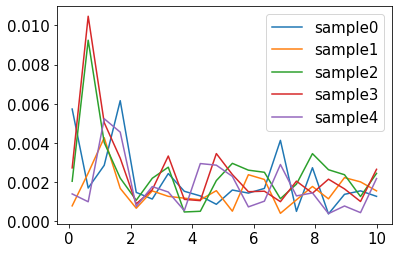

In [8]:
for j,el in enumerate(time):
    plt.plot(lags,el,label="sample"+str(j))
plt.legend()
print(time[0])
print(lags)

## Analysis and export model for a selected lag time  
I decide to perform the Deep-TICA Analysis for 12 different seeds

In [6]:
seeds = 4045, 151, 500, 35, 1986, 1462, 2277, 38, 1865, 4939, 3892, 3232,
print(seeds)
train_parameters["lag_time"] = 1

for seed in seeds:

    print("training with seed: ",seed)
    #fix seed (random split)
    torch.manual_seed(seed)
    model,data,logweight,X = training(sim_parameters["temp"],folder+"COLVAR",train_parameters)
    #-- export checkpoint (for loading the model back to python) and torchscript traced module --#
    save_folder = "test_different_seeds/lag"+str(train_parameters["lag_time"])+"/deeptica_seed"+str(seed)+"/"    
    try:
        os.mkdir(save_folder)
    except:
        print("already exists")
    #-- move to cpu before saving results --#
    model.to("cpu")
    model.export(save_folder)
    print("model saved")

(4045, 151, 500, 35, 1986, 1462, 2277, 38, 1865, 4939, 3892, 3232)
training with seed:  4045
no weights
Time-lagged pairs:	 999998
Training data:		 699998
Validation data:	 300000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.011      -0.014      0.005  0.001  
100   -0.009      -0.009      0.006  0.002  
INFO: Early stopping
104   -0.008      -0.009      0.006  0.002  
model saved
training with seed:  151
no weights
Time-lagged pairs:	 999998
Training data:		 699998
Validation data:	 300000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    0.005       -0.004      0.004  -0.010 
100   0.005       -0.003      0.004  -0.010 
INFO: Early stopping
101   0.005       -0.003      0.004  -0.010 
model saved
training with seed:  500
no weights
Time-lagged pairs:	 999998
Training data:		 699998
Validation data:	 300000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.485      -0.480      0.005  -0.006 
100   -0.220      -0.215      0.007  0.002  
INFO: